<a href="https://colab.research.google.com/github/Mamadou2025/Max-Gcd-Rickart-Semiring-Code-Tester/blob/main/Dual_Rickart_Gcd_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from itertools import product

def gcd(x, y):
    """Computes the GCD of x and y with gcd(0,0) = 0"""
    while y != 0:
        x, y = y, x % y
    return abs(x) if x != 0 else 0

def is_endomorphism(f, M):
    """Checks if f preserves the GCD operation"""
    return all(f[gcd(x, y)] == gcd(f[x], f[y]) for x, y in product(M, repeat=2))

def is_idempotent(f, M):
    """Checks if f ∘ f = f"""
    return all(f[f[x]] == f[x] for x in M)

def direct_image(f, M):
    """Computes the direct image of f"""
    return {f[x] for x in M}

def extended_image(f, M):
    """Computes the closure of the image under GCD"""
    im_f = direct_image(f, M)
    return {y for y in M if any(gcd(y, f[x]) in im_f for x in M)}

def kernel(f, M):
    """Computes the kernel of f (values x where f(x) = 0)"""
    return {x for x in M if f[x] == 0}

def generate_valid_functions(M):
    """Generates all valid endomorphism functions"""
    functions = []
    for f_vals in product(M, repeat=len(M)):
        f = dict(enumerate(f_vals))
        if f[0] == 0 and is_endomorphism(f, M):
            functions.append(f)
    return functions

def analyze_functions(M):
    """Displays analysis and checks the Dual weak Rickart property"""
    valid_functions = generate_valid_functions(M)
    idempotents = [g for g in valid_functions if is_idempotent(g, M)]

    # Display table
    print("\nFunction".ljust(15), "Idempotent".ljust(12), "Image".ljust(15),
          "Extended Image".ljust(18), "Kernel".ljust(15), "i-regular")
    print("-" * 85)

    for f in valid_functions:
        f_tuple = tuple(f[i] for i in sorted(M))
        im = direct_image(f, M)
        im_et = extended_image(f, M)
        ker = kernel(f, M)

        line = f"{str(f_tuple).ljust(15)} | "
        line += f"{'Yes'.ljust(10) if is_idempotent(f, M) else 'No'.ljust(10)} | "
        line += f"{str(im).ljust(13)} | "
        line += f"{str(im_et).ljust(16)} | "
        line += f"{str(ker).ljust(13)} | "
        line += "Yes" if im == im_et else "No"  # ✅ Corrected i-regular logic
        print(line)

    # Check Dual weak Rickart property
    is_dual_weak_rickart = True
    for f in valid_functions:
        im_et_f = extended_image(f, M)
        # Check if there exists an idempotent g such that im_et_f == kernel(g)
        if not any(im_et_f == kernel(g, M) for g in idempotents):
            is_dual_weak_rickart = False
            break

    print("\nFinal Result:")
    print("M is Dual weak Rickart :", "Yes" if is_dual_weak_rickart else "No")

# Example usage
n = 2  # You can modify n
M = list(range(n + 1))
analyze_functions(M)


Function       Idempotent   Image           Extended Image     Kernel          i-regular
-------------------------------------------------------------------------------------
(0, 0, 0)       | Yes        | {0}           | {0}              | {0, 1, 2}     | Yes
(0, 1, 0)       | Yes        | {0, 1}        | {0, 1, 2}        | {0, 2}        | No
(0, 1, 1)       | Yes        | {0, 1}        | {0, 1, 2}        | {0}           | No
(0, 1, 2)       | Yes        | {0, 1, 2}     | {0, 1, 2}        | {0}           | Yes
(0, 2, 0)       | No         | {0, 2}        | {0, 2}           | {0, 2}        | Yes
(0, 2, 2)       | Yes        | {0, 2}        | {0, 2}           | {0}           | Yes

Final Result:
M is Dual weak Rickart : Yes


HOW TO USE THIS CODE Choose your n and execute. Result four n=2

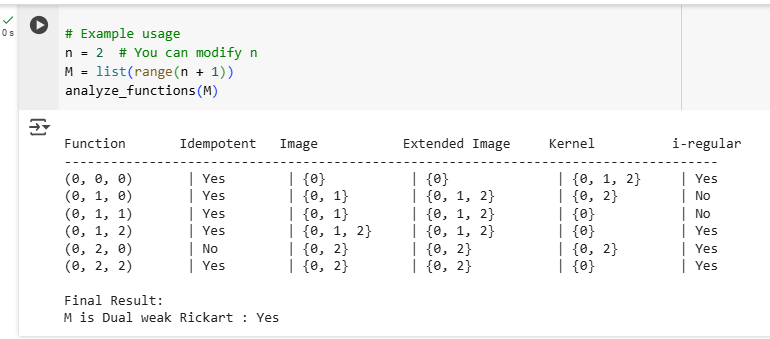

Rickart Property Algorithm: A Simple Overview

This code tests certain algebraic properties (i-Rickart and w-Rickart) of semimodules over natural numbers using the GCD operation. It analyzes all possible functions (endomorphisms) on a set M = {0, 1, ..., n}, where n is provided by the user.

Steps Involved:

Define the Set: Generate the set M = {0, 1, ..., n}, where n is a user-defined integer.

Generate Functions: Identify all possible endomorphisms f of M. These are functions that:

Map 0 to 0.
Preserve the GCD operation: f(gcd(x, y)) = gcd(f(x), f(y)), for all x, y in M.
Check Idempotency: For each function f, determine if it is idempotent, meaning f(f(x)) = f(x).

Compute Subtractive Closure: Combine certain valid functions in S to check if their results align with predefined algebraic closure rules.

Test i-Rickart Property: Verify if every idempotent function f composes correctly with other functions.

Test w-Rickart Property: Check if subtractive closure matches the set of endomorphisms S.

Output Results: Report whether the structure satisfies the i-Rickart and/or w-Rickart properties.

How to Use:

Run the program with different values of n to analyze varying semimodule structures.
Outputs will indicate whether S, the set of valid endomorphisms, satisfies the required Rickart properties.